## Alaska Berry Futures
### Precipitation change over time

March 28, 2023    
Using SNAP precipitation models to investigate how precipitation may affect pollinator movements in AK's future    
http://data.snap.uaf.edu/data/Base/Other/Community_charts_tool_database/    
https://catalog.snap.uaf.edu/geonetwork/srv/eng/catalog.search#/metadata/b3b9581e-cccc-440f-bb2f-0fd6754d8d41    


In [18]:
import pandas as pd
import os
import numpy as np

import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
working_directory = os.getcwd()

all_precip_data =  pd.read_csv(working_directory + "\\SNAP_Community_Climate_Charts_Data_20230313.csv", skiprows=4)

In [20]:
AK_precip = all_precip_data[(all_precip_data['country']=="US")&(all_precip_data['type']=='Precipitation')].copy()



In [21]:

# Specify the CRS of the alaska_ecoregions shapefile
crs = {'init': 'epsg:3338'}

# Load the shapefile into a GeoDataFrame and set the CRS
alaska_ecoregions = gpd.read_file(working_directory + '\\UnifiedEcoregionsAlaska2001\\akecoregions-ShapeFile\\akecoregions.shp', crs=crs)
alaska_ecoregions = alaska_ecoregions.set_crs(epsg=3338)


# Perform a spatial join between the two dataframes based on the latitude and longitude columns
communities = AK_precip[['community', 'latitude', 'longitude']]

# convert the latitude and longitude coordinates to a Point object
geometry = [Point(xy) for xy in zip(AK_precip.longitude, AK_precip.latitude)]
communities = communities.drop(['longitude', 'latitude'], axis=1)
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(communities, crs=crs, geometry=geometry)

# Reproject the alaska_ecoregions GeoDataFrame to the same CRS as the communities GeoDataFrame
alaska_ecoregions = alaska_ecoregions.to_crs(crs)

# Perform the spatial join between the two GeoDataFrames
joined_df = gpd.sjoin(geo_df, alaska_ecoregions, how="left", op="within")

AK_precip = pd.merge(AK_precip, joined_df[['community','LEVEL_2']], on='community', how='left')

C:\Users\LindseyParkinson\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\LindseyParkinson\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [22]:
joined_df['LEVEL_2'].unique()

array(['Coastal Rainforests', 'Bering Taiga', 'Aleutian Meadows',
       'Intermontane Boreal', nan, 'Alaska Range Transition',
       'Arctic Tundra', 'Bering Tundra', 'Coast Mountains Transition',
       'Pacific Mountains Transition'], dtype=object)

In [23]:
#AK_precip = pd.merge(AK_precip, joined_df[['community','LEVEL_2']], on='community', how='left')

In [31]:
#alaska_ecoregions[['LEVEL_2', 'geometry']].to_excel('ecoregion_geometry_example.xlsx', index=False)

In [24]:

columns_to_drop = [col for col in AK_precip.columns if 'Min' in col or 'Max' in col]
AK_precip = AK_precip.drop(columns_to_drop, axis=1)


In [28]:
AK_precip.groupby(['community', 'latitude', 'longitude']).count()

,,,id,region,country,type,scenario,resolution,unit,daterange,janMean,febMean,...,aprMean,mayMean,junMean,julMean,augMean,sepMean,octMean,novMean,decMean,LEVEL_2
community,latitude,longitude,,,,,,,,,,,,,,,,,,,,,
Afognak,58.0078,-152.768,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
Akhiok,56.9455,-154.170,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
Akiachak,60.9094,-161.431,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
Akiak,60.9122,-161.214,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
Akutan,54.1385,-165.778,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wiseman,67.4100,-150.107,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
Womens Bay,57.7099,-152.586,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
Woody Island,57.7800,-152.355,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [26]:
regional_precip = AK_precip.groupby(['LEVEL_2','daterange']).mean().copy()#.reset_index().copy()

In [27]:
regional_precip

latitude   longitude     janMean  \
LEVEL_2                      daterange                                       
Alaska Range Transition      2030-2039   61.398131 -150.340748   38.166667   
                             2060-2069   61.398131 -150.340748   41.865385   
                             2090-2099   61.398131 -150.340748   41.282051   
                             Historical  61.398131 -150.340748   32.596154   
Aleutian Meadows             2030-2039   55.389024 -134.739514  113.792793   
                             2060-2069   55.389024 -134.739514  117.990991   
                             2090-2099   55.389024 -134.739514  119.009009   
                             Historical  55.389024 -134.739514  101.297297   
Arctic Tundra                2030-2039   69.332820 -156.038800   14.600000   
                             2060-2069   69.332820 -156.038800   17.422222   
                             2090-2099   69.332820 -156.038800   17.711111   
                             Historical  69.332820 -156.038800   13.466667   
Bering Taiga                 2030-2039   60.824398 -161.410807   31.000000   
                             2060-2069   60.824398 -161.410807   33.864341   
                             2090-2099   60.824398 -161.410807   33.798450   
                             Historical  60.824398 -161.410807   27.406977   
Bering Tundra                2030-2039   64.553652 -165.674090   26.321839   
                             2060-2069   64.553652 -165.674090   30.390805   
                             2090-2099   64.553652 -165.674090   30.057471   
                             Historical  64.553652 -165.674090   23.862069   
Coast Mountains Transition   2030-2039   61.957433 -142.660000   22.000000   
                             2060-2069   61.957433 -142.660000   24.555556   
                             2090-2099   61.957433 -142.660000   23.333333   
                             Historical  61.957433 -142.660000   19.666667   
Coastal Rainforests          2030-2039   58.197691 -141.624797  201.653680   
                             2060-2069   58.197691 -141.624797  219.909091   
                             2090-2099   58.197691 -141.624797  214.883117   
                             Historical  58.197691 -141.624797  191.181818   
Intermontane Boreal          2030-2039   64.486578 -150.248118   17.425532   
                             2060-2069   64.486578 -150.248118   19.673759   
                             2090-2099   64.486578 -150.248118   19.120567   
                             Historical  64.486578 -150.248118   15.904255   
Pacific Mountains Transition 2030-2039   62.120046 -145.186046   19.153846   
                             2060-2069   62.120046 -145.186046   21.051282   
                             2090-2099   62.120046 -145.186046   20.307692   
                             Historical  62.120046 -145.186046   17.230769   

                                            febMean     marMean     aprMean  \
LEVEL_2                      daterange                                        
Alaska Range Transition      2030-2039    34.852564   33.512821   24.115385   
                             2060-2069    34.750000   33.955128   26.980769   
                             2090-2099    35.782051   34.910256   27.647436   
                             Historical   29.096154   27.346154   22.211538   
Aleutian Meadows             2030-2039   103.117117   99.252252   73.927928   
                             2060-2069   103.873874  103.828829   80.963964   
                             2090-2099   111.099099  111.324324   89.396396   
                             Historical   93.567568   88.837838   71.810811   
Arctic Tundra                2030-2039    13.200000   13.044444   11.666667   
                             2060-2069    13.888889   13.333333   13.600000   
                             2090-2099    14.333333   13.488889   13.888889   
                             Historical   11.73333

In [10]:
regional_precip = regional_precip.drop(columns=['longitude','latitude']).reset_index()

In [11]:
#regional_precip.to_excel('Alaska_regional_precipitation_predictions.xlsx', index=False)

In [12]:
# reshape the data using melt
df = pd.melt(regional_precip, id_vars=['LEVEL_2', 'daterange'], var_name='month', value_name='precipitation')

# rename the columns
df = df.rename(columns={'month': 'month_name'})

# remove the 'Mean' part from the month names
df['month_name'] = df['month_name'].str.replace('Mean', '')

In [13]:
#df.to_excel("alaska_regional_precipitation_predictions_melt.xlsx", index=False)

In [14]:
Interior = df[df['LEVEL_2']=='Intermontane Boreal'].copy()

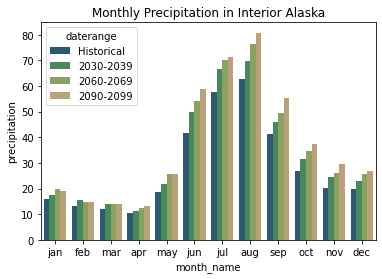

In [15]:
# Interior = df[df['LEVEL_2']=='Intermontane Boreal'].copy()

# # specify the order of daterange levels
# daterange_order = ['Historical', '2030-2039', '2060-2069', '2090-2099']

# # create the bar plot with the specified order of daterange levels
# sns.barplot(data=Interior, x="month_name", y="precipitation", hue="daterange", palette="gist_earth", hue_order=daterange_order)
# plt.title("Monthly Precipitation in Interior Alaska")
# plt.savefig("interior_precipitation.png")

In [17]:


# # specify the order of daterange levels
# daterange_order = ['Historical', '2030-2039', '2060-2069', '2090-2099']

# # group the data by unique values in LEVEL_2
# groups = df.groupby('LEVEL_2')

# # loop through each group and create a bar plot
# for name, group in groups:
#     # create the bar plot with the specified order of daterange levels
#     sns.barplot(data=group, x="month_name", y="precipitation", hue="daterange", palette="gist_earth", hue_order=daterange_order)
#     plt.title("Monthly Precipitation in {}".format(name))
# #    plt.show()
#     plt.savefig("{}_precipitation.png".format(name))
#     plt.clf() # clear the plot for the next iteration


<Figure size 432x288 with 0 Axes>

In [ ]:
# import pandas as pd
# import geopandas as gpd
# from shapely.geometry import Point

# def merge_point_and_region(point_dataframe, region_dataframe, region_column):
#     # Convert point_dataframe to a GeoDataFrame with Point geometries
#     geometry = [Point(xy) for xy in zip(point_dataframe.longitude, point_dataframe.latitude)]
#     point_gdf = gpd.GeoDataFrame(point_dataframe.drop(['longitude', 'latitude'], axis=1), 
#                                  crs='epsg:4326', 
#                                  geometry=geometry)
    
#     # Reproject region_dataframe to match point_gdf
#     region_gdf = region_dataframe.to_crs(point_gdf.crs)
    
#     # Perform the spatial join
#     joined_gdf = gpd.sjoin(point_gdf, region_gdf, how='left', op='within')
    
#     # Merge the region_column from region_dataframe into point_dataframe
#     return pd.merge(point_dataframe, joined_gdf[['index_right', region_column]], 
#                     left_index=True, right_index=True, how='left')


In [ ]:
# point_dataframe = pd.read_csv('path/to/point/dataframe.csv')
# region_dataframe = gpd.read_file('path/to/region/shapefile.shp')

# merged_dataframe = merge_point_and_region(point_dataframe, region_dataframe, 'region_name')